In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from matplotlib import rcParams
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.weightstats import ttest_ind

%matplotlib inline

In [8]:
sns.set_style('darkgrid')
rcParams['figure.figsize'] = 10, 7

In [9]:
df = pd.read_excel('crime.xls')
df.head()

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0


In [10]:
# Cleaning data

df = df.drop(range(0,4))

df.columns = ['City', 'Population', 'Violent Crime', 'Murder and nonnegligent manslaughter',
             'Rape (revised definition)', 'Rape (legacy definition)', 'Robbery', 'Aggravated assault',
             'Property Crime', 'Burglary', 'Larceny theft', 'Motor vehicle theft', 'Arson']

df = df.drop(range(352, 355))
df = df.drop('Rape (revised definition)',axis=1)
df['Pop sqrd'] = df['Population']**2 # adding this variable as per the course material
df = df.drop('Arson', axis=1)
df.head()

,City,Population,Violent Crime,Murder and nonnegligent manslaughter,Rape (legacy definition),Robbery,Aggravated assault,Property Crime,Burglary,Larceny theft,Motor vehicle theft,Pop sqrd
4,Adams Village,1861,0,0,0,0,0,12,2,10,0,3463321
5,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1,6640929
6,Akron Village,2846,3,0,0,0,3,16,1,15,0,8099716
7,Albany,97956,791,8,30,227,526,4090,705,3243,142,9595377936
8,Albion Village,6388,23,0,3,4,16,223,53,165,5,40806544


In [11]:
linreg = LinearRegression()

X = df[['Population', 'Violent Crime', 'Murder and nonnegligent manslaughter', 'Rape (legacy definition)',
       'Robbery', 'Aggravated assault', 'Burglary', 'Larceny theft', 'Motor vehicle theft', 'Pop sqrd']]
Y = df[['Property Crime']]

linreg.fit(X,Y)

print('intercept: ', linreg.intercept_)
print('score: ', linreg.score(X,Y))

multi_reg_df = pd.DataFrame(['Population', 'Violent Crime', 'Murder and nonnegligent manslaughter', 'Rape (legacy definition)',
       'Robbery', 'Aggravated assault', 'Burglary', 'Larceny theft', 'Motor vehicle theft', 'Pop sqrd'])

multi_reg_df.columns = ['Features']
multi_reg_df['Coef'] = linreg.coef_.reshape(-1,1)

multi_reg_df

intercept:  [3.41060513e-12]
score:  1.0


,Features,Coef
0,Population,-2.779441e-17
1,Violent Crime,3.166625e-08
2,Murder and nonnegligent manslaughter,-3.166608e-08
3,Rape (legacy definition),-3.166619e-08
4,Robbery,-3.166626e-08
5,Aggravated assault,-3.166625e-08
6,Burglary,1.000000e+00
7,Larceny theft,1.000000e+00
8,Motor vehicle theft,1.000000e+00
9,Pop sqrd,-6.617445e-24


In [12]:
per_cap = pd.DataFrame(df['City'])
for column in df.columns[2:]:
    per_cap[column] = df[column] / df['Population']
    
per_cap.head()

,City,Violent Crime,Murder and nonnegligent manslaughter,Rape (legacy definition),Robbery,Aggravated assault,Property Crime,Burglary,Larceny theft,Motor vehicle theft,Pop sqrd
4,Adams Village,0,0,0,0,0,0.00644815,0.00107469,0.00537346,0,1861
5,Addison Town and Village,0.00116414,0,0,0,0.00116414,0.00931315,0.00116414,0.00776096,0.000388048,2577
6,Akron Village,0.00105411,0,0,0,0.00105411,0.00562193,0.00035137,0.00527056,0,2846
7,Albany,0.00807505,8.16693e-05,0.00030626,0.00231737,0.00536976,0.0417534,0.00719711,0.0331067,0.00144963,97956
8,Albion Village,0.0036005,0,0.000469631,0.000626174,0.0025047,0.0349092,0.00829681,0.0258297,0.000782718,6388


In [13]:
X = per_cap[['Violent Crime', 'Murder and nonnegligent manslaughter', 'Rape (legacy definition)',
       'Robbery', 'Aggravated assault', 'Burglary', 'Larceny theft', 'Motor vehicle theft', 'Pop sqrd']]
Y = per_cap[['Property Crime']]

linreg.fit(X,Y)

print('intercept: ', linreg.intercept_)
print('score: ', linreg.score(X,Y))

multi_reg_df = pd.DataFrame(['Violent Crime', 'Murder and nonnegligent manslaughter', 'Rape (legacy definition)',
       'Robbery', 'Aggravated assault', 'Burglary', 'Larceny theft', 'Motor vehicle theft', 'Pop sqrd'])

multi_reg_df.columns = ['Features']
multi_reg_df['Coef'] = linreg.coef_.reshape(-1,1)

multi_reg_df

intercept:  [2.42861287e-17]
score:  1.0


,Features,Coef
0,Violent Crime,8.638461e-11
1,Murder and nonnegligent manslaughter,-8.619896e-11
2,Rape (legacy definition),-8.639314e-11
3,Robbery,-8.638930e-11
4,Aggravated assault,-8.638911e-11
5,Burglary,1.000000e+00
6,Larceny theft,1.000000e+00
7,Motor vehicle theft,1.000000e+00
8,Pop sqrd,-9.264423e-23


In [17]:
for name in per_cap.columns[1:]:
    print(name)
    print(ttest_ind(df[name], df['Property Crime']))
    print()

Violent Crime
(-1.3510077031843961, 0.1771332464038115, 694.0)

Murder and nonnegligent manslaughter
(-1.9265211870328454, 0.05444737412010908, 694.0)

Rape (legacy definition)
(-1.9159975010939447, 0.05577595199451313, 694.0)

Robbery
(-1.7371257414306294, 0.08280864626785202, 694.0)

Aggravated assault
(-1.5959064397160516, 0.11096492062396444, 694.0)

Property Crime
(0.0, 1.0, 694.0)

Burglary
(-1.6270388907081414, 0.1041827498305473, 694.0)

Larceny theft
(-0.2917927281946784, 0.7705323041418227, 694.0)

Motor vehicle theft
(-1.8403453708991824, 0.06614434512218745, 694.0)

Pop sqrd
(1.0048657907223446, 0.31531170560626226, 694.0)



In [15]:
X = per_cap[[ 'Burglary', 'Larceny theft', 'Motor vehicle theft']]
Y = per_cap[['Property Crime']]

linreg.fit(X,Y)

print('intercept: ', linreg.intercept_)
print('score: ', linreg.score(X,Y))

multi_reg_df = pd.DataFrame([ 'Burglary', 'Larceny theft', 'Motor vehicle theft'])

multi_reg_df.columns = ['Features']
multi_reg_df['Coef'] = linreg.coef_.reshape(-1,1)

multi_reg_df

intercept:  [-6.9388939e-18]
score:  1.0


,Features,Coef
0,Burglary,1.0
1,Larceny theft,1.0
2,Motor vehicle theft,1.0


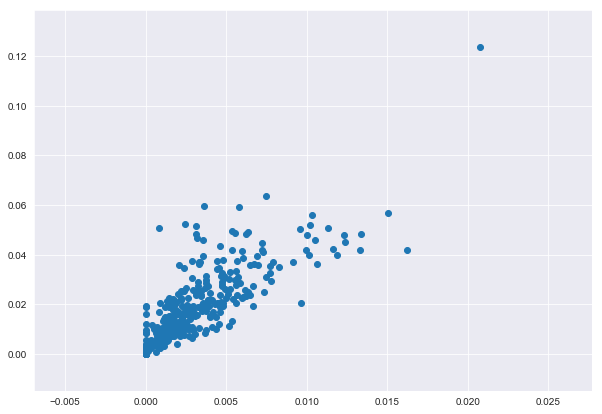

In [27]:
plt.scatter(per_cap['Burglary'], per_cap['Property Crime'])


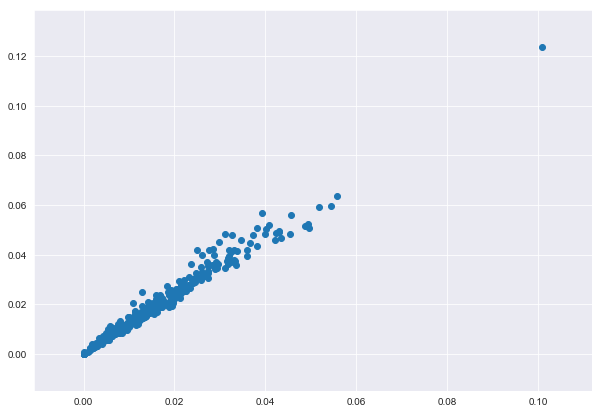

In [28]:
plt.scatter(per_cap['Larceny theft'], per_cap['Property Crime'])

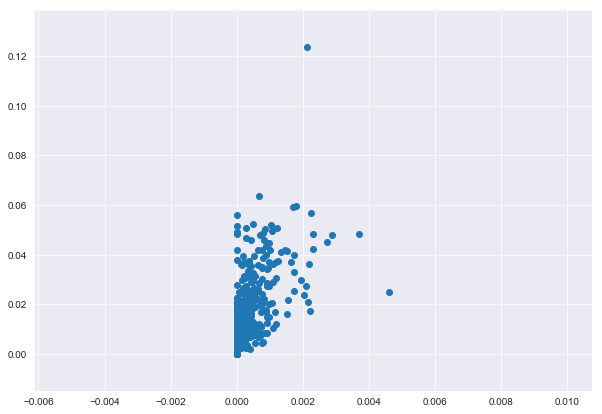

In [29]:
plt.scatter(per_cap['Motor vehicle theft'], per_cap['Property Crime'])